# NLP analysis for Wine Taster's review.

### Data 620 Final Project

### Team: Fireflies

### Members: Chunhui Zhu, Yuen Chun Wong, and Chunmei Zhu

### Date: 5/22/2019

## Data

The data was scraped from WineEnthusiast on November 22nd, 2017. The code for the scraper can be found https://github.com/zackthoutt/wine-deep-learning. The author collected the title of each review, the tasters name, and the taster's Twitter handle.

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', 1000) #avoid the truncate in description
raw = pd.read_csv("https://github.com/czhu505/Data620-Fireflies/blob/master/Final%20project/winemag-data.csv?raw=true")

In [3]:
raw.head(3)

,Unnamed: 0,country,description,designation,points,price,province,taster_name,taster_twitter_handle,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
1,2,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
2,3,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Tandem


### The number of wine variety in the review:

In [4]:
raw['variety'].nunique()

446


### The number of tasters:

In [5]:
raw['taster_name'].nunique()

16

### The number of reviews:

In [6]:
raw.shape[0]

37419

## Sentimental analysis 

### 1: Determine what is the sentimental score for each wine review by NLTK's package (e.g. SentimentAnalyzer/NaiveBayesClassifier)

In [19]:
import nltk

try:
  subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:10]]

except:  
  nltk.download("all")

import numpy as np

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.tokenize import word_tokenize
from nltk.sentiment.util import *
import networkx as nx
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.tokenize import RegexpTokenizer
from collections import Counter


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_

[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\czhu5\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |   

## Data Cleaning

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37419 entries, 0 to 37418
Data columns (total 11 columns):
Unnamed: 0               37419 non-null int64
country                  37419 non-null object
description              37419 non-null object
designation              37419 non-null object
points                   37419 non-null int64
price                    37419 non-null int64
province                 37419 non-null object
taster_name              37419 non-null object
taster_twitter_handle    37419 non-null object
variety                  37419 non-null object
winery                   37419 non-null object
dtypes: int64(3), object(8)
memory usage: 3.1+ MB


In [11]:
#check null values
total = raw.isnull().sum().sort_values(ascending = False)
percent = (raw.isnull().sum()/raw.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

In [12]:
#check duplicates in raw
print("Total number of examples: ", raw.shape[0])
print("Number of examples with the same description: ", raw[raw.duplicated(['description'])].shape[0])

Total number of examples:  37419
Number of examples with the same description:  3540


In [13]:
#remove duplicates 
raw = raw.drop_duplicates(['description'])
raw = raw.reset_index(drop=True)

In [14]:
#find all missing values with -1
raw = raw.fillna(-1)

## Build a vocaburary by point levers

In [15]:
from collections import Counter

def buildWords_all_words(subset):
    # extract text
    subset['description']= subset['description'].str.lower()
    subset['description']= subset['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
    
    # use regex to tokenize sentences to list of words
    tokenizer = RegexpTokenizer(r'\w+')
    descriptions = subset['description'].apply(tokenizer.tokenize)
   
    # clean stop words and 
    stopword_list = stopwords.words('english')
    ps = PorterStemmer()
    descriptions = descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
    descriptions = descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
    subset['description_cleaned'] = descriptions.apply(lambda elem: ' '.join(elem))
    
    #split destription into single words and create vocabulary 
    #add new feature -description lengths
    all_words = [word for tokens in descriptions for word in tokens]
    #VOCAB = sorted(list(set(all_words)))
        
    #Check most common words
    #count_all_words = Counter(all_words)      
    
    return all_words #count_all_words

In [16]:
raw[(raw.taster_name == 'Michael Schachner') & (raw.variety == 'Tempranillo-Merlot')]

,Unnamed: 0,country,description,designation,points,price,province,taster_name,taster_twitter_handle,variety,winery
2,3,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Tandem
1926,1933,Spain,"Sweet red plum aromas are candied and jumbled. The wine is clacky in the mouth, with a lot of acidity and narrow, sweet cherry flavors. Shows heat and burn on the finish. 50% Tempranillo-50% Merlot.",Dance Del Mar,83,12,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Solar de Urbezo
7885,7950,Spain,"Best on the nose, but sharp and narrow as can be on the palate. Cranberry and sour cherry flavors dominate, while the finish is astringent. No amount of swirling and saving is going help it much.",Oak Aged,80,17,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Reula
9794,9905,Spain,"A little rusty in color, with earthy, stemmy, baked fruit aromas mixed with a dose of dried leaves. Seems a lot like Cabernet Franc with its herbal, leafy overtones and dry plum and cherry flavors. Finishes short and herbal, but with good feel and flow.",Care Crianza,85,20,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Bodegas Añadas


## Build a vocaburary by point levers

In [17]:
def buildWords_all_words(subset):
    # extract text
    subset['description']= subset['description'].str.lower()
    subset['description']= subset['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
    
    # use regex to tokenize sentences to list of words
    tokenizer = RegexpTokenizer(r'\w+')
    descriptions = subset['description'].apply(tokenizer.tokenize)
   
    # clean stop words and 
    stopword_list = stopwords.words('english')
    ps = PorterStemmer()
    descriptions = descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
    descriptions = descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
    subset['description_cleaned'] = descriptions.apply(lambda elem: ' '.join(elem))
    
    #split destription into single words and create vocabulary 
    #add new feature -description lengths
    all_words = [word for tokens in descriptions for word in tokens]
    #VOCAB = sorted(list(set(all_words)))
        
    #Check most common words
    #count_all_words = Counter(all_words)      
    
    return all_words #count_all_words


## Word Counts for Wine which points <90

In [24]:
#split data by points <90 
less90 = raw[raw.points < 90]
commLess90 = buildWords_all_words(less90)
#type(commLess90)

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

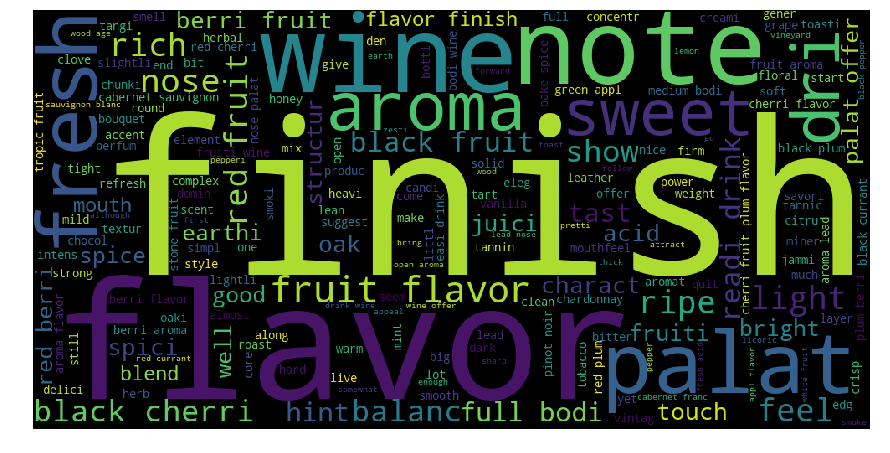

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

#convert list to string and generate
unique_string=(" ").join(commLess90)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Words for Wine with less than 90 score"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [27]:
# word cloud for below 90
wordCount_less90 = Counter(commLess90)
#wordCount_less90.most_common(100)  
df_less90 = pd.DataFrame.from_dict(wordCount_less90, orient='index').reset_index()
df_less90.columns = ['word','count']
df_less90.head()

,word,count
0,ripe,3638
1,fruiti,2259
2,wine,10624
3,smooth,994
4,still,706


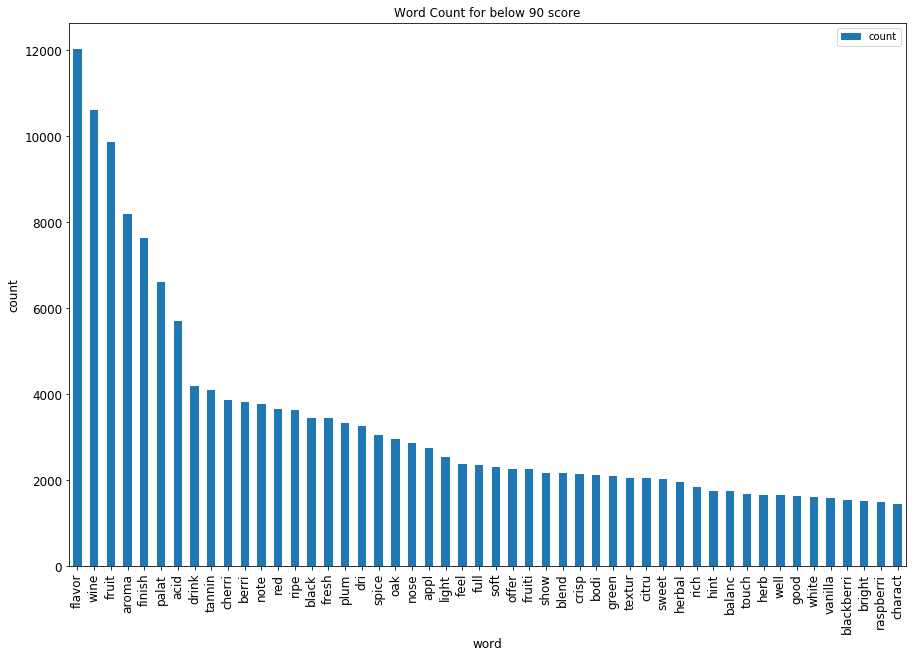

In [28]:
#top 50 count words for wines <90
import matplotlib.pyplot as plt
df_less90 = df_less90.set_index('word')
ax = df_less90.sort_values(by='count', ascending=False).head(50).plot(kind='bar', title ="Word Count for below 90 score", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("word", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()

### Word Counts for Wine which points >=90

In [29]:
#split data by points >=90
above90 = raw[raw.points >= 90]
commAbove90 = buildWords_all_words(above90)
#type(commAbove90)

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

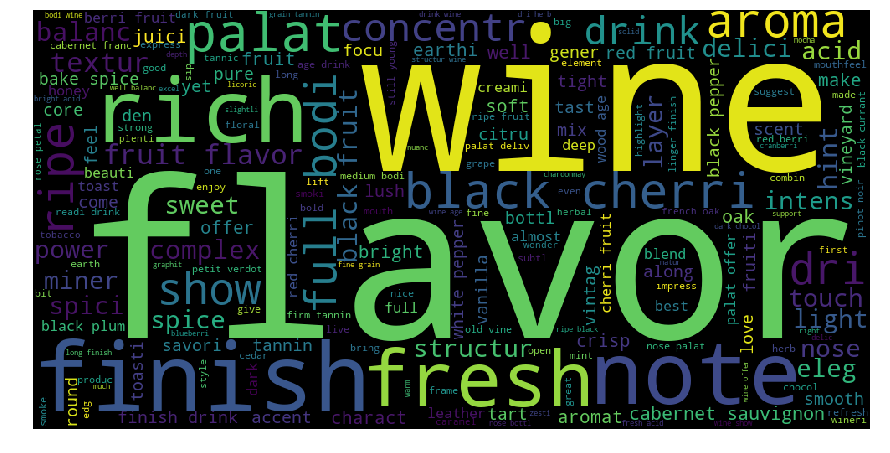

In [30]:
#convert list to string and generate
unique_string=(" ").join(commAbove90)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Words for Wine with above 90 score"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [31]:
# word cloud for below 90
wordCount_more90 = Counter(commAbove90)
#wordCount_more90.most_common(100)  
df_more90 = pd.DataFrame.from_dict(wordCount_more90, orient='index').reset_index()
df_more90.columns = ['word','count']
df_more90.head()

,word,count
0,blend,1831
1,roughli,16
2,two,264
3,third,78
4,shiraz,108


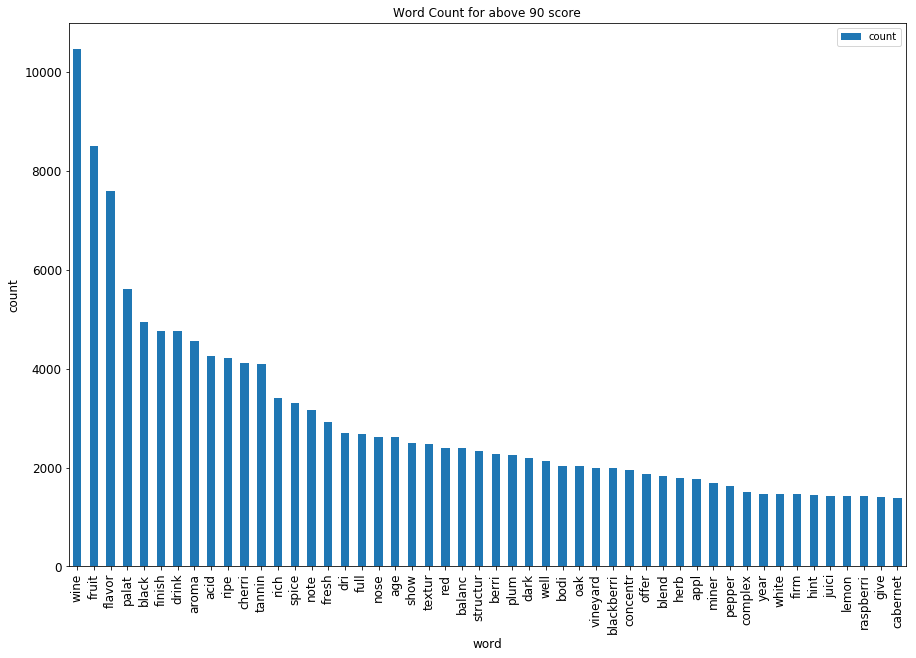

In [32]:
#top 50 count words for wines <90
import matplotlib.pyplot as plt
df_more90 = df_more90.set_index('word')
ax = df_more90.sort_values(by='count', ascending=False).head(50).plot(kind='bar', title ="Word Count for above 90 score", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("word", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.show()

### Comment Word Counts for Portuguese Red

In [37]:
Portuguese_Red = raw[raw.variety =='Portuguese Red']
comm_Portuguese_Red = buildWords_all_words(Portuguese_Red)

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

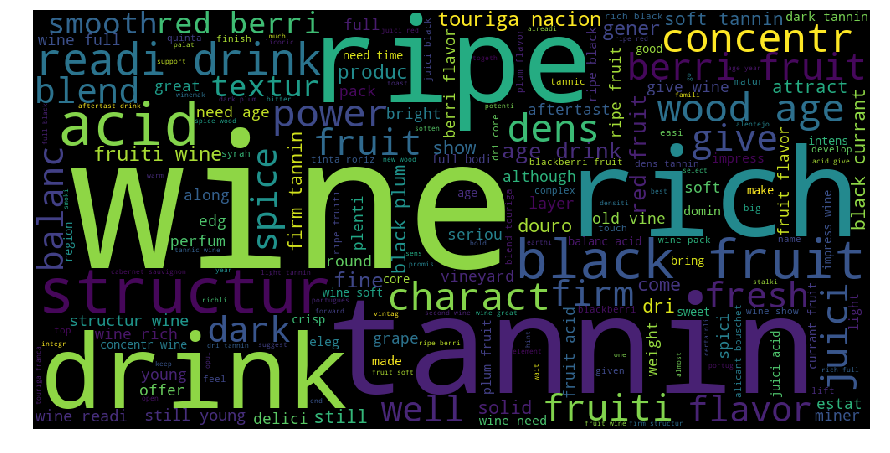

In [38]:
#convert list to string and generate
unique_string=(" ").join(comm_Portuguese_Red)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("Comment Words for comm_Portuguese_Red"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Comment Word Counts for Rose

In [39]:
rose = raw[raw.variety =='Rosé']
comm_rose = buildWords_all_words(rose)

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

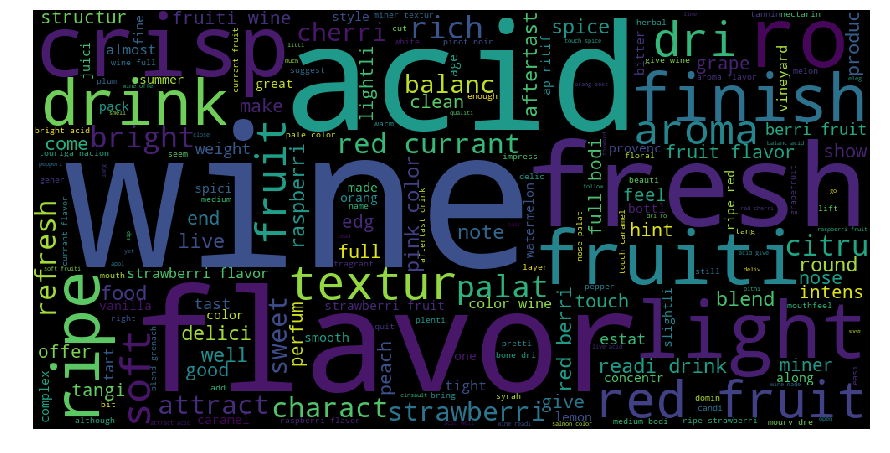

In [40]:
#convert list to string and generate
unique_string=(" ").join(comm_rose)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Comment Words for Rose"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Tester' Reviewer-'Roger Voss': common words on each variety

In [34]:
#find list to taster_name
#tasters = raw.taster_name.unique()
tasters = ['Roger Voss']
comm_variety = pd.DataFrame()


for t in tasters:
    taster = raw[raw["taster_name"] == t]
    varieties = taster.variety.unique()
    for v in varieties:
        common = taster[taster["variety"] == v]
        all_words =  buildWords_all_words(common)
        words = Counter(all_words)
        
        #save data to a dataframe
        new = pd.DataFrame.from_dict(words, orient='index').reset_index()
        new['tasters'] = t
        new['variety'] = v
        comm_variety = comm_variety.append(new)
        

comm_variety.columns = ['word','count', 'taster','variety']

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [35]:
comm_variety.columns = ['word','count', 'taster','variety']

In [36]:
comm_variety.head()

,word,count,taster,variety
0,ripe,496,Roger Voss,Portuguese Red
1,fruiti,292,Roger Voss,Portuguese Red
2,wine,1632,Roger Voss,Portuguese Red
3,smooth,139,Roger Voss,Portuguese Red
4,still,179,Roger Voss,Portuguese Red


In [41]:
comm_variety2 = comm_variety[comm_variety['count']<500]
comm_variety2 = comm_variety2[comm_variety2['count']>100]

In [42]:
variety_nodes= list(set(comm_variety2["variety"].tolist()))
word_nodes = list(set(comm_variety2["word"].tolist()))
comm_variety3 = comm_variety2[['variety','word','count']]
edges = [tuple(i) for i in comm_variety3.values]

In [43]:
G = nx.Graph()
G.add_nodes_from(variety_nodes,bipartite="variety")
G.add_nodes_from(word_nodes,bipartite="word")
G.add_weighted_edges_from(edges)

In [44]:
nx.is_connected(G)

True

In [45]:
import networkx.algorithms.bipartite as bi
bi_variety_nodes, bi_word_nodes = bi.sets(G)

C:\Users\czhu5\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


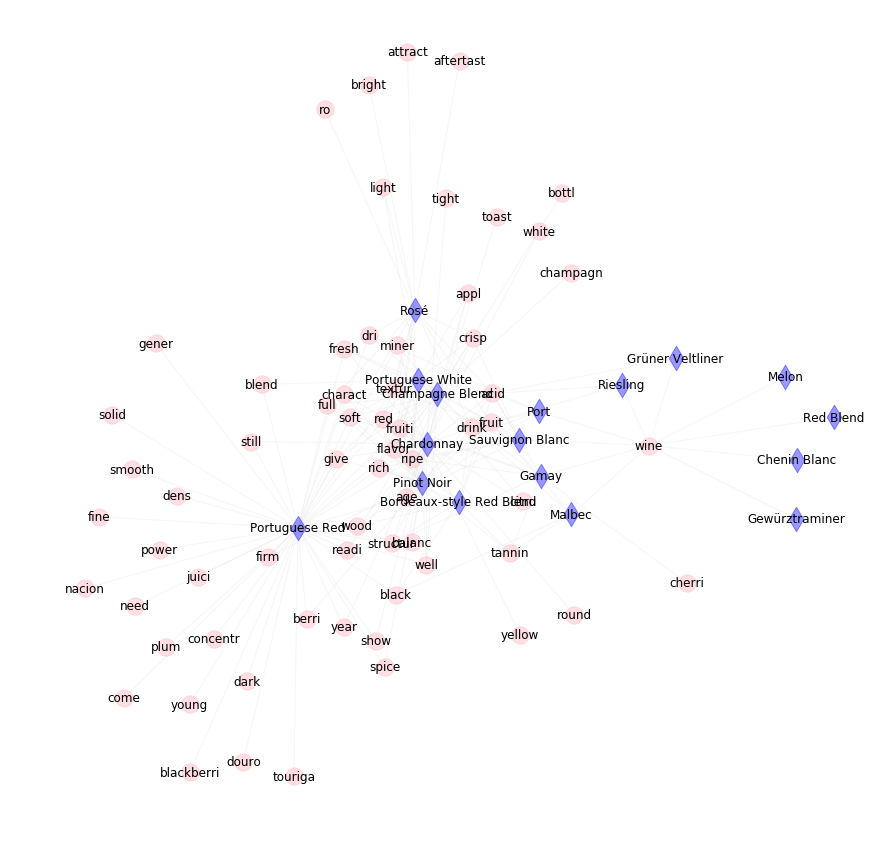

In [46]:
pos = nx.spring_layout(G,k=1)
plt.figure(figsize=(15,15))

nx.draw_networkx_edges(G, pos, edge_color="darkgray", alpha=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=bi_variety_nodes, node_color="blue", alpha=0.4, node_shape="d", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=bi_word_nodes, node_color="pink", alpha=0.5, node_size=300)
nx.draw_networkx_labels(G,pos, font_color='black', font_size='12')
plt.axis('off')
plt.show()

## Sentiment for Taster's Review (cont.)

In [48]:
tokens = nltk.word_tokenize(raw['description'][1])
print(tokens)

['Much', 'like', 'the', 'regular', 'bottling', 'from', '2012', ',', 'this', 'comes', 'across', 'as', 'rather', 'rough', 'and', 'tannic', ',', 'with', 'rustic', ',', 'earthy', ',', 'herbal', 'characteristics', '.', 'Nonetheless', ',', 'if', 'you', 'think', 'of', 'it', 'as', 'a', 'pleasantly', 'unfussy', 'country', 'wine', ',', 'it', "'s", 'a', 'good', 'companion', 'to', 'a', 'hearty', 'winter', 'stew', '.']


In [49]:
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(100, 100)

In [50]:
print(subj_docs[1:10])

[(['color', ',', 'musical', 'bounce', 'and', 'warm', 'seas', 'lapping', 'on', 'island', 'shores', '.', 'and', 'just', 'enough', 'science', 'to', 'send', 'you', 'home', 'thinking', '.'], 'subj'), (['it', 'is', 'not', 'a', 'mass-market', 'entertainment', 'but', 'an', 'uncompromising', 'attempt', 'by', 'one', 'artist', 'to', 'think', 'about', 'another', '.'], 'subj'), (['a', 'light-hearted', 'french', 'film', 'about', 'the', 'spiritual', 'quest', 'of', 'a', 'fashion', 'model', 'seeking', 'peace', 'of', 'mind', 'while', 'in', 'a', 'love', 'affair', 'with', 'a', 'veterinarian', 'who', 'is', 'a', 'non-practicing', 'jew', '.'], 'subj'), (['my', 'wife', 'is', 'an', 'actress', 'has', 'its', 'moments', 'in', 'looking', 'at', 'the', 'comic', 'effects', 'of', 'jealousy', '.', 'in', 'the', 'end', ',', 'though', ',', 'it', 'is', 'only', 'mildly', 'amusing', 'when', 'it', 'could', 'have', 'been', 'so', 'much', 'more', '.'], 'subj'), (['works', 'both', 'as', 'an', 'engaging', 'drama', 'and', 'an', 'in

We choose VADER Sentimental Analyzer because it performs very well on social media or micro-blogging text as well as Emojis, Slangs and Emoticons.

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. All these should add up to 1.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [57]:
# call VADER to produce sentimental scores 

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

#sia.polarity_scores(string) => return dictionary => e.g. {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.6486}

raw['VADER'] = raw['description'].apply(lambda x: sia.polarity_scores(x))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\czhu5\AppData\Roaming\nltk_data...


In [51]:
#show example result
raw.head(1)

,Unnamed: 0,country,description,designation,points,price,province,taster_name,taster_twitter_handle,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos


In [58]:
#init the allocation
raw['VADER_pos'] = raw['points']
raw['VADER_neg'] = raw['points']
raw['VADER_neu'] = raw['points']
raw['VADER_compound'] = raw['points']

raw['VADER_pos'] = raw['VADER'].apply(lambda x: x['pos'])
raw['VADER_neg'] = raw['VADER'].apply(lambda x: x['neg'])
raw['VADER_neu'] = raw['VADER'].apply(lambda x: x['neu'])
raw['VADER_compound'] = raw['VADER'].apply(lambda x: x['compound'])


In [59]:
#what is the average of positive sentimental score for wine by variety
wine_avg_positive_score = raw.groupby(['variety'])['VADER_pos'].mean()
wine_avg_positive_score.head(5)


variety
Abouriou       0.000000
Agiorgitiko    0.167158
Aglianico      0.078043
Albana         0.130000
Albanello      0.136000
Name: VADER_pos, dtype: float64

In [60]:
def first_last_by_value_df(x):
  #sort dataframe by 'VADER_pos', return the first and last row
  return x.sort_values(by=['VADER_pos'],ascending=False).iloc[[0,-1]]

In [61]:
def First_3_by_value_df(x, key, is_ascending = False):
  #sort dataframe by 'VADER_pos', return the first and last row
  return x.sort_values(by=[key],ascending=is_ascending).head(3)

In [62]:
raw.head()

,Unnamed: 0,country,description,designation,points,price,province,taster_name,taster_twitter_handle,variety,winery,VADER_pos,VADER_neg,VADER_neu,VADER_compound,VADER
0,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos,0.132,0.0,0.868,0.6486,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.6486}"
1,2,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks,0.195,0.0,0.805,0.8176,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8176}"
2,3,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Michael Schachner,@wineschach,Tempranillo-Merlot,Tandem,0.040,0.0,0.960,0.1655,"{'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.1655}"
3,4,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Kerin O’Keefe,@kerinokeefe,Frappato,Terre di Giurfo,0.157,0.0,0.843,0.6369,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.6369}"
4,5,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Roger Voss,@vossroger,Pinot Gris,Jean-Baptiste Adam,0.192,0.0,0.808,0.7506,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.7506}"


In [63]:
#for each wine, whose review are top 3 highest and lowest sentimental score?

#'highest' positive sentiment
highest_3_sentimental_per_wine = raw.groupby(['variety'])['taster_name', 'VADER_pos'].apply(lambda x: First_3_by_value_df(x, 'VADER_pos'))

highest_3_sentimental_per_wine

taster_name  VADER_pos
variety                                                   
Abouriou               18047     Virginie Boone      0.000
Agiorgitiko            4682     Susan Kostrzewa      0.339
                       19588    Susan Kostrzewa      0.257
                       2418     Susan Kostrzewa      0.255
Aglianico              18842      Kerin O’Keefe      0.250
                       4836       Kerin O’Keefe      0.211
                       28992      Kerin O’Keefe      0.201
Albana                 2211       Kerin O’Keefe      0.182
                       4175       Kerin O’Keefe      0.078
Albanello              1855       Kerin O’Keefe      0.136
Albariño               13400  Michael Schachner      0.306
                       28349      Matt Kettmann      0.265
                       32163  Michael Schachner      0.263
Aleatico               2667       Kerin O’Keefe      0.118
Alfrocheiro            29524         Roger Voss      0.253
                       3101          Roger Voss      0.247
                       32754         Roger Voss      0.194
Alicante Bouschet      12380         Roger Voss      0.387
                       24545         Roger Voss      0.305
                       8779          Roger Voss      0.284
Aligoté                8485          Roger Voss      0.526
                       28833         Roger Voss      0.274
                       18994         Roger Voss      0.162
Alsace white blend     5014    Anne Krebiehl MW      0.287
                       18579   Anne Krebiehl MW      0.281
                       33066   Anne Krebiehl MW      0.264
Altesse                19798         Roger Voss      0.333
Alvarelhão             13898     Virginie Boone      0.045
Alvarinho              1052          Roger Voss      0.343
                       4234          Roger Voss      0.330
...                                         ...        ...
Weissburgunder         29933   Anne Krebiehl MW      0.370
                       18984   Anne Krebiehl MW      0.292
                       15745   Anne Krebiehl MW      0.277
Welschriesling         4949          Roger Voss      0.336
                       27362   Anne Krebiehl MW      0.326
                       15231         Roger Voss      0.286
White Blend            28248       Paul Gregutt      0.463
                       21834         Roger Voss      0.408
                       12213         Jim Gordon      0.385
White Riesling         18872       Paul Gregutt      0.387
                       14839      Lauren Buzzeo      0.167
Xarel-lo               22288  Michael Schachner      0.385
                       7122   Michael Schachner      0.068
                       513    Michael Schachner      0.051
Xinomavro              21363    Susan Kostrzewa      0.359
                       3802     Susan Kostrzewa      0.320
                       7024     Susan Kostrzewa      0.258
Zibibbo                5773       Kerin O’Keefe      0.276
                       7596       Kerin O’Keefe      0.171
                       22159      Kerin O’Keefe      0.153
Zierfandler            2729    Anne Krebiehl MW      0.292
                       13318   Anne Krebiehl MW      0.267
                       22142   Anne Krebiehl MW      0.259
Zierfandler-Rotgipfler 4517    Anne Krebiehl MW      0.200
Zinfandel              28267       Paul Gregutt      0.506
                       23458         Jim Gordon      0.470
                       6212        Paul Gregutt      0.434
Zweigelt               31058   Anne Krebiehl MW      0.410
                       24970   Anne Krebiehl MW      0.393
                       23796   Anne Krebiehl MW      0.350

[1047 rows x 2 columns]

In [64]:
# 'highest' negative sentiment score
lowest_3_sentimental_per_wine = raw.groupby(['variety'])['taster_name', 'VADER_neg'].apply(lambda x: First_3_by_value_df(x, 'VADER_neg'))

lowest_3_sentimental_per_wine

taster_name  VADER_neg
variety                                                   
Abouriou               18047     Virginie Boone      0.000
Agiorgitiko            18720    Susan Kostrzewa      0.075
                       18620    Susan Kostrzewa      0.067
                       2418     Susan Kostrzewa      0.000
Aglianico              30         Kerin O’Keefe      0.094
                       1348       Kerin O’Keefe      0.094
                       7484       Kerin O’Keefe      0.085
Albana                 4175       Kerin O’Keefe      0.112
                       2211       Kerin O’Keefe      0.000
Albanello              1855       Kerin O’Keefe      0.052
Albariño               31532  Michael Schachner      0.182
                       1633   Michael Schachner      0.165
                       8942   Michael Schachner      0.159
Aleatico               2667       Kerin O’Keefe      0.000
Alfrocheiro            3101          Roger Voss      0.000
                       7047          Roger Voss      0.000
                       11690         Roger Voss      0.000
Alicante Bouschet      28612      Matt Kettmann      0.103
                       12433         Roger Voss      0.050
                       6374          Roger Voss      0.040
Aligoté                5986    Sean P. Sullivan      0.000
                       8485          Roger Voss      0.000
                       17794         Roger Voss      0.000
Alsace white blend     25977   Anne Krebiehl MW      0.057
                       22372   Anne Krebiehl MW      0.043
                       4185    Anne Krebiehl MW      0.033
Altesse                19798         Roger Voss      0.000
Alvarelhão             13898     Virginie Boone      0.000
Alvarinho              30671         Roger Voss      0.092
                       14340         Roger Voss      0.064
...                                         ...        ...
Weissburgunder         627           Roger Voss      0.000
                       3849    Anne Krebiehl MW      0.000
                       9523    Anne Krebiehl MW      0.000
Welschriesling         7030    Anne Krebiehl MW      0.104
                       27362   Anne Krebiehl MW      0.061
                       16432   Anne Krebiehl MW      0.035
White Blend            19764  Michael Schachner      0.235
                       16076  Michael Schachner      0.232
                       22654  Michael Schachner      0.192
White Riesling         14839      Lauren Buzzeo      0.000
                       18872       Paul Gregutt      0.000
Xarel-lo               12798  Michael Schachner      0.218
                       19171  Michael Schachner      0.057
                       933    Michael Schachner      0.036
Xinomavro              32058    Susan Kostrzewa      0.060
                       21363    Susan Kostrzewa      0.056
                       3802     Susan Kostrzewa      0.000
Zibibbo                5773       Kerin O’Keefe      0.000
                       7016       Kerin O’Keefe      0.000
                       7596       Kerin O’Keefe      0.000
Zierfandler            2815    Anne Krebiehl MW      0.058
                       22142   Anne Krebiehl MW      0.056
                       21850         Roger Voss      0.031
Zierfandler-Rotgipfler 4517    Anne Krebiehl MW      0.000
Zinfandel              10501     Virginie Boone      0.218
                       23909     Virginie Boone      0.196
                       10459     Virginie Boone      0.142
Zweigelt               18320         Roger Voss      0.088
                       29185         Roger Voss      0.066
                       18736         Roger Voss      0.062

[1047 rows x 2 columns]

In [65]:
highest_3_sentimental_per_wine

taster_name  VADER_pos
variety                                                   
Abouriou               18047     Virginie Boone      0.000
Agiorgitiko            4682     Susan Kostrzewa      0.339
                       19588    Susan Kostrzewa      0.257
                       2418     Susan Kostrzewa      0.255
Aglianico              18842      Kerin O’Keefe      0.250
                       4836       Kerin O’Keefe      0.211
                       28992      Kerin O’Keefe      0.201
Albana                 2211       Kerin O’Keefe      0.182
                       4175       Kerin O’Keefe      0.078
Albanello              1855       Kerin O’Keefe      0.136
Albariño               13400  Michael Schachner      0.306
                       28349      Matt Kettmann      0.265
                       32163  Michael Schachner      0.263
Aleatico               2667       Kerin O’Keefe      0.118
Alfrocheiro            29524         Roger Voss      0.253
                       3101          Roger Voss      0.247
                       32754         Roger Voss      0.194
Alicante Bouschet      12380         Roger Voss      0.387
                       24545         Roger Voss      0.305
                       8779          Roger Voss      0.284
Aligoté                8485          Roger Voss      0.526
                       28833         Roger Voss      0.274
                       18994         Roger Voss      0.162
Alsace white blend     5014    Anne Krebiehl MW      0.287
                       18579   Anne Krebiehl MW      0.281
                       33066   Anne Krebiehl MW      0.264
Altesse                19798         Roger Voss      0.333
Alvarelhão             13898     Virginie Boone      0.045
Alvarinho              1052          Roger Voss      0.343
                       4234          Roger Voss      0.330
...                                         ...        ...
Weissburgunder         29933   Anne Krebiehl MW      0.370
                       18984   Anne Krebiehl MW      0.292
                       15745   Anne Krebiehl MW      0.277
Welschriesling         4949          Roger Voss      0.336
                       27362   Anne Krebiehl MW      0.326
                       15231         Roger Voss      0.286
White Blend            28248       Paul Gregutt      0.463
                       21834         Roger Voss      0.408
                       12213         Jim Gordon      0.385
White Riesling         18872       Paul Gregutt      0.387
                       14839      Lauren Buzzeo      0.167
Xarel-lo               22288  Michael Schachner      0.385
                       7122   Michael Schachner      0.068
                       513    Michael Schachner      0.051
Xinomavro              21363    Susan Kostrzewa      0.359
                       3802     Susan Kostrzewa      0.320
                       7024     Susan Kostrzewa      0.258
Zibibbo                5773       Kerin O’Keefe      0.276
                       7596       Kerin O’Keefe      0.171
                       22159      Kerin O’Keefe      0.153
Zierfandler            2729    Anne Krebiehl MW      0.292
                       13318   Anne Krebiehl MW      0.267
                       22142   Anne Krebiehl MW      0.259
Zierfandler-Rotgipfler 4517    Anne Krebiehl MW      0.200
Zinfandel              28267       Paul Gregutt      0.506
                       23458         Jim Gordon      0.470
                       6212        Paul Gregutt      0.434
Zweigelt               31058   Anne Krebiehl MW      0.410
                       24970   Anne Krebiehl MW      0.393
                       23796   Anne Krebiehl MW      0.350

[1047 rows x 2 columns]

## 5. Top Wine Taster's influencer
## Top Wine influencer relationship between taster - wine - followers



In [66]:
#Collect Taster's Twitter following info.
twitter_handle_follower = {}
for twitter_handle in raw.taster_twitter_handle.unique():
  twitter_handle_follower[twitter_handle] = 0

In [67]:
#input twitter handle follower info
twitter_handle_follower['@vossroger'] = 1006
twitter_handle_follower['@paulgwine\xa0'] = 3206
twitter_handle_follower['@wineschach'] = 1401
twitter_handle_follower['@kerinokeefe'] = 6036
twitter_handle_follower['@vboone'] = 2247
twitter_handle_follower['@mattkettmann'] = 2498
twitter_handle_follower['@wawinereport'] = 10300
twitter_handle_follower['@JoeCz'] = 4691
twitter_handle_follower['@laurbuzz'] = 1903
twitter_handle_follower['@gordone_cellars'] = 974
twitter_handle_follower['@worldwineguys'] = 2607
twitter_handle_follower['@suskostrzewa'] = 1885
twitter_handle_follower['@AnneInVino'] = 6323
twitter_handle_follower['@bkfiona'] = 232
twitter_handle_follower['@winewchristina'] = 3734 #ckpickard


In [68]:
taster_variety = raw[['taster_name','taster_twitter_handle','variety']]
#get # of reviews per variety
variety_reviewed_count = taster_variety.groupby('variety')['variety'].count()

In [69]:
# top and bottom # of reviews
least_reviewed = variety_reviewed_count.sort_values(axis=0, ascending=True)[0:25]
most_reviewed = variety_reviewed_count.sort_values(axis=0, ascending=False)[0:25]

In [70]:
# taster -- variety by # of review
least_taster_variety = taster_variety[  taster_variety['variety'].isin(least_reviewed.index.tolist())  ]
most_taster_variety = taster_variety[  taster_variety['variety'].isin(most_reviewed.index.tolist())  ]

In [71]:
taster_variety = pd.concat([least_taster_variety, most_taster_variety])

In [72]:
#remove duplicate taster -- wine
taster_variety = taster_variety.drop_duplicates()
taster_variety['taster_name'] = taster_variety['taster_name'].apply(lambda x: x.strip())

In [73]:
taster_variety['follower'] = taster_variety['taster_twitter_handle'].apply(lambda x: twitter_handle_follower[x])

In [74]:
taster_variety.head()

,taster_name,taster_twitter_handle,variety,follower
690,Lauren Buzzeo,@laurbuzz,Merlot-Argaman,1903
1297,Sean P. Sullivan,@wawinereport,Marsanne-Viognier,10300
2234,Matt Kettmann,@mattkettmann,Muskat,2498
2832,Kerin O’Keefe,@kerinokeefe,Nascetta,6036
4386,Paul Gregutt,@paulgwine,Mourvèdre-Syrah,3206


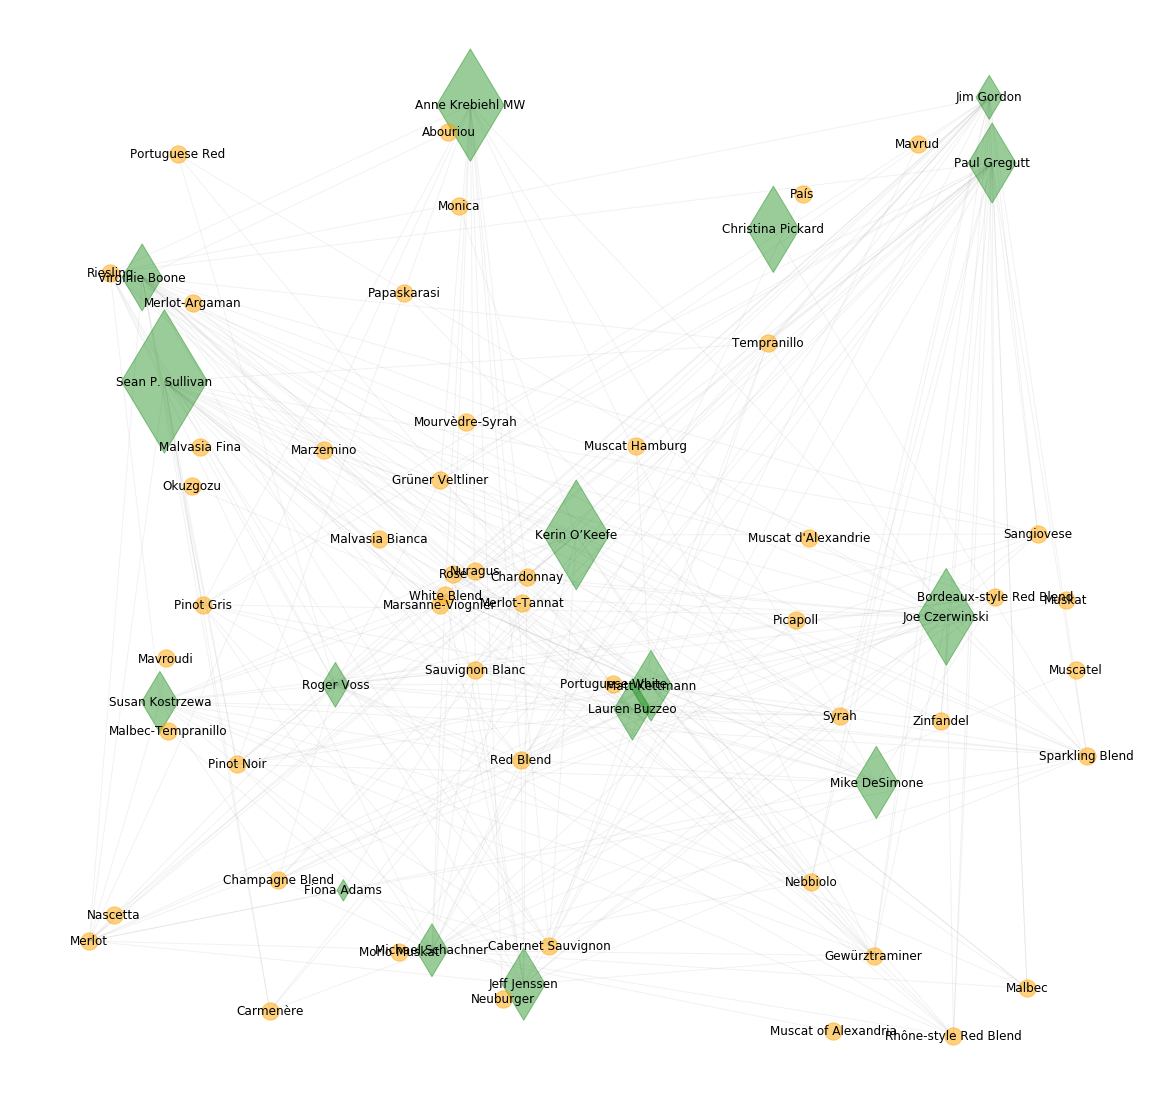

In [75]:
import networkx.algorithms.bipartite as bi
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in taster_variety.iterrows():
  G.add_edges_from([(row['taster_name'], row['variety'])])
  
pos = nx.random_layout(G)
plt.figure(figsize=(20,20))


bi_taster_name, bi_variety = bi.sets(G)

taster_node_size = []

for n in bi_taster_name:
  taster_node_size.append(taster_variety[taster_variety['taster_name']==n].follower.unique())


nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=bi_taster_name, node_color="g", alpha=0.4, node_shape="d", node_size=taster_node_size)
nx.draw_networkx_nodes(G, pos, nodelist=bi_variety, node_color="orange", alpha=0.5, node_size=300)
nx.draw_networkx_labels(G,pos, font_color='black', font_size='12')
plt.axis('off')
plt.show()



## 6. Best Values Wine

In [76]:
# best value = price * VADER compound score
# VADER compound score, higher is better.

best_price_wine = raw[['variety','price','VADER_compound']]

best_price_wine['value'] = best_price_wine['VADER_compound'] / best_price_wine['price']  

mean_best_price_wine = best_price_wine.groupby('variety')['value'].mean()

mean_best_price_wine = mean_best_price_wine * 100

C:\Users\czhu5\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
word_freq = mean_best_price_wine.to_dict()

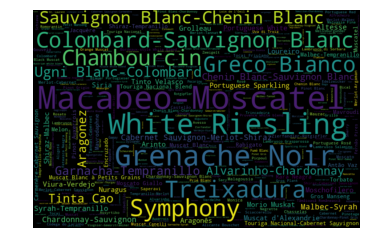

In [80]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=900,height=600, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [81]:
# get average wine price
mean_wine_price = best_price_wine.groupby('variety')['price'].mean()

dict_mean_wine_price = mean_wine_price.to_dict()

#only top 5 best value
mean_best_price_wine2 = mean_best_price_wine.sort_values(axis=0, ascending=False).head(5)

#convert series to dataframe
mean_best_price_wine2 = mean_best_price_wine2.to_frame()
  
#mean_best_price_wine.sort_values(axis=0, ascending=False).head(5)

mean_best_price_wine2.reset_index(inplace=True)

mean_best_price_wine2['price'] = mean_best_price_wine2['variety'].apply(lambda x: dict_mean_wine_price[x]) 

mean_best_price_wine2

,variety,value,price
0,Macabeo-Moscatel,8.870000,8.0
1,White Riesling,7.923516,16.5
2,Grenache Noir,7.781111,9.0
3,Treixadura,6.442667,15.0
4,Symphony,6.350000,12.0


In [82]:
raw.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'taster_name', 'taster_twitter_handle', 'variety',
       'winery', 'VADER_pos', 'VADER_neg', 'VADER_neu', 'VADER_compound',
       'VADER'],
      dtype='object')

In [87]:
df_pos=highest_3_sentimental_per_wine.reset_index()

In [88]:
df_pos=df_pos.drop_duplicates(subset=['variety','taster_name'], keep=False)

In [89]:
df_pos=df_pos.reset_index(drop=True)
df_pos.head()

,variety,level_1,taster_name,VADER_pos
0,Abouriou,18047,Virginie Boone,0.000
1,Albanello,1855,Kerin O’Keefe,0.136
2,Albariño,28349,Matt Kettmann,0.265
3,Aleatico,2667,Kerin O’Keefe,0.118
4,Altesse,19798,Roger Voss,0.333


In [91]:
df_pos["VADER_pos%"]=round(df_pos["VADER_pos"]*100,1)
df_pos=df_pos.drop(columns=['VADER_pos','level_1'])
df_pos.head()

,variety,taster_name,VADER_pos%
0,Abouriou,Virginie Boone,0.0
1,Albanello,Kerin O’Keefe,13.6
2,Albariño,Matt Kettmann,26.5
3,Aleatico,Kerin O’Keefe,11.8
4,Altesse,Roger Voss,33.3


In [92]:
df_pos["VADER_pos%"].quantile([0.25,0.5,0.75])

0.25     8.825
0.50    17.100
0.75    26.175
Name: VADER_pos%, dtype: float64

In [93]:
#color the edges
df_pos['color'] = np.where(df_pos["VADER_pos%"]>18,  'dodgerblue','orangered')

In [94]:
dec_graph = nx.from_pandas_edgelist(df_pos, source='taster_name', 
                                      target='variety',
                                      edge_attr='color',
                                      create_using = nx.DiGraph())

edges = dec_graph.edges()
colors = [dec_graph[u][v]['color'] for u,v in edges]

node_color= []

dec_graph.nodes()

#show from node and to node
print(edges)

[('Virginie Boone', 'Abouriou'), ('Virginie Boone', 'Alvarelhão'), ('Virginie Boone', 'Barbera'), ('Virginie Boone', 'Black Muscat'), ('Virginie Boone', 'Cabernet Franc'), ('Virginie Boone', 'Grenache Blend'), ('Virginie Boone', 'Grenache-Mourvèdre'), ('Virginie Boone', 'Grenache-Syrah'), ('Virginie Boone', 'Marsanne-Roussanne'), ('Virginie Boone', 'Meritage'), ('Virginie Boone', 'Mission'), ('Virginie Boone', 'Moscato'), ('Virginie Boone', 'Moscato Giallo'), ('Virginie Boone', 'Picpoul'), ('Virginie Boone', 'Primitivo'), ('Virginie Boone', 'Rhône-style White Blend'), ('Virginie Boone', 'Roussanne'), ('Virginie Boone', 'Sangiovese Cabernet'), ('Virginie Boone', 'Scheurebe'), ('Virginie Boone', 'Shiraz'), ('Virginie Boone', 'Syrah'), ('Virginie Boone', 'Syrah-Grenache'), ('Virginie Boone', 'Syrah-Grenache-Viognier'), ('Virginie Boone', 'Sémillon'), ('Virginie Boone', 'Teroldego'), ('Virginie Boone', 'Valdiguié'), ('Virginie Boone', 'Viognier'), ('Kerin O’Keefe', 'Albanello'), ('Kerin O’

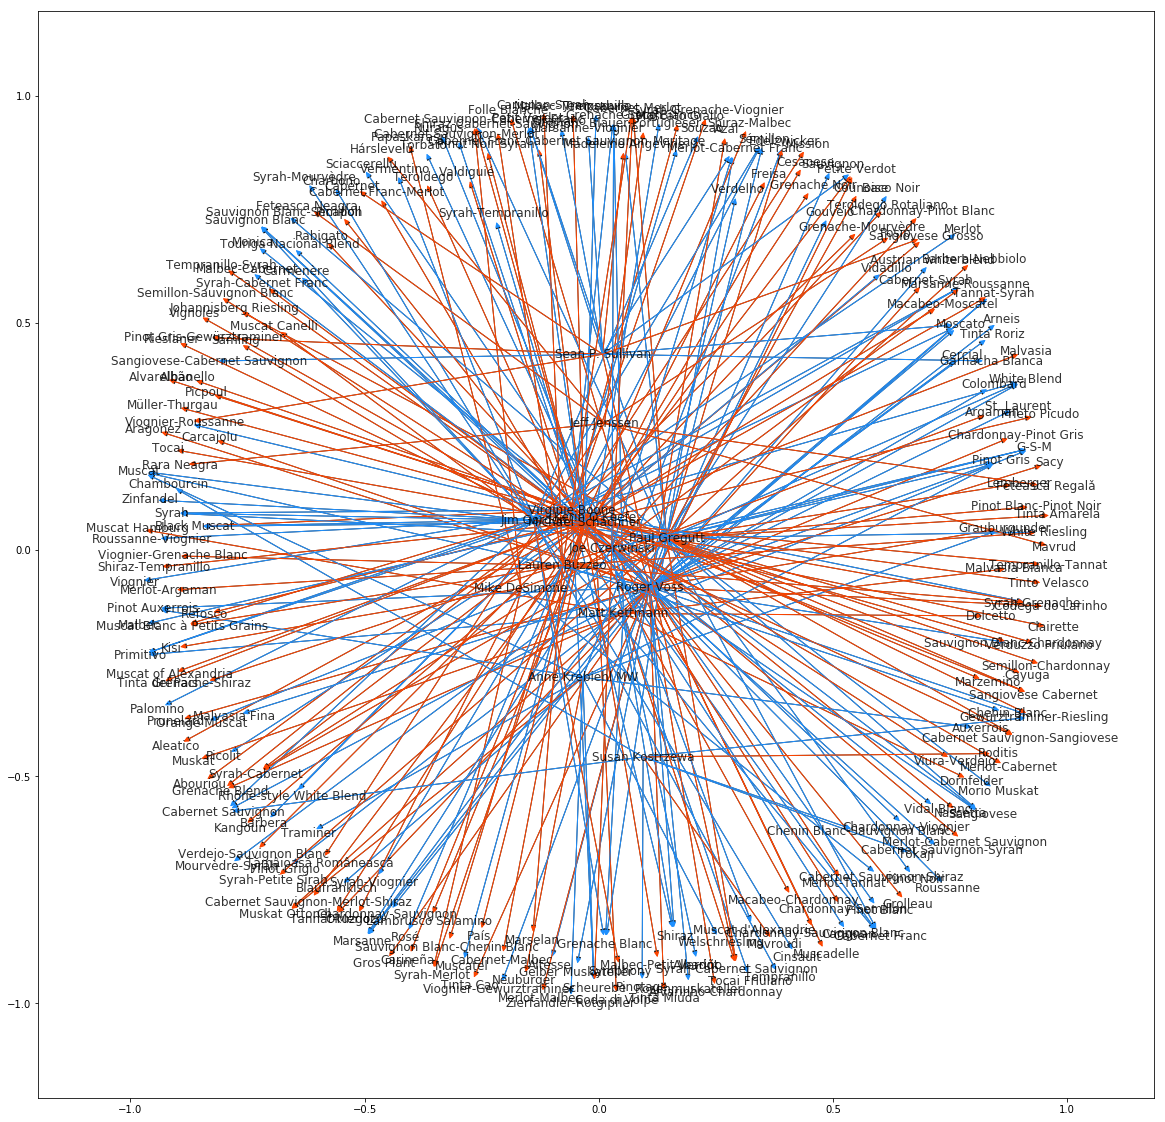

In [95]:
pos = nx.spring_layout(dec_graph)
plt.figure(figsize = (20,20))
nx.draw_networkx(G=dec_graph, with_labels = True, pos=pos,node_list=dec_graph.nodes(), node_color = node_color,
                      alpha=0.8, node_size=400,cmap=plt.cm.jet)

nx.draw_networkx_edges(G=dec_graph, pos=pos, edge_color=colors,
                       arrows=True)
plt.show()

In [96]:
# calculate centrality metrics
degree = pd.DataFrame.from_dict(dict(nx.degree(dec_graph)), orient='index', columns=['Degree'])
deg_cent = pd.DataFrame.from_dict(nx.degree_centrality(dec_graph), orient='index', columns=['Deg_cent'])
#eigen_cent = pd.DataFrame.from_dict(nx.eigenvector_centrality(dec_graph), orient='index', columns=['Eigen_cent'])
clos_cent = pd.DataFrame.from_dict(nx.closeness_centrality(dec_graph), orient='index', columns=['Clos_cent'])
#bet_cent = pd.DataFrame.from_dict(nx.betweenness_centrality(dec_graph), orient='index', columns=['Bet_cent'])

dfs = [degree,deg_cent,clos_cent]

from functools import reduce # to merge multiple dataframes
metrics = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)
metrics.sort_values('Degree', ascending=False).head(10)

,Degree,Deg_cent,Clos_cent
Roger Voss,53,0.212,0.0
Michael Schachner,46,0.184,0.0
Paul Gregutt,41,0.164,0.0
Virginie Boone,27,0.108,0.0
Jim Gordon,23,0.092,0.0
Joe Czerwinski,18,0.072,0.0
Lauren Buzzeo,17,0.068,0.0
Matt Kettmann,17,0.068,0.0
Kerin O’Keefe,17,0.068,0.0
Sean P. Sullivan,14,0.056,0.0


In [97]:
wine_name=['Malbec-Cabernet', 'St. Laurent','Grenache Blend','Austrian white blend', 'Symphony','Rosenmuskateller', 'Rosé', 'Roussanne']
df_pos2=df_pos[df_pos["variety"].isin(wine_name)]
print(df_pos2['taster_name'].unique())

print(df_pos2["VADER_pos%"].median())

print(len(df_pos2))

['Roger Voss' 'Matt Kettmann' 'Virginie Boone' 'Michael Schachner'
 'Lauren Buzzeo' 'Jim Gordon']
24.2
9


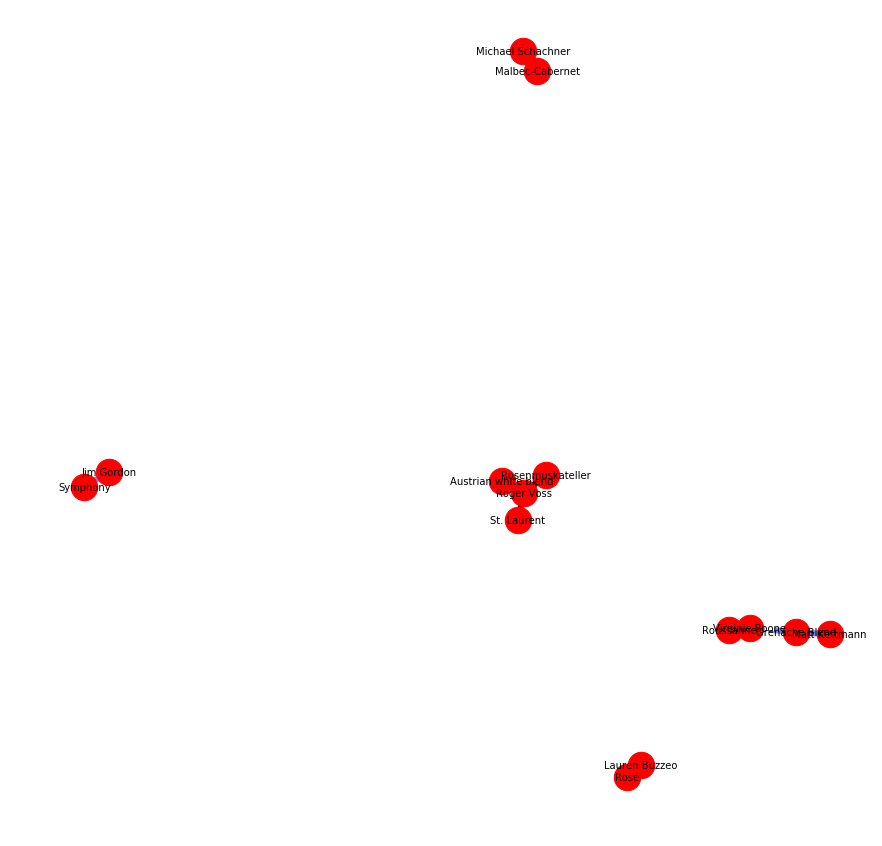

In [98]:
G=nx.Graph()

for index, row in df_pos2.iterrows():
    G.add_edge(row[1], row[0], weight=row[2])

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if int(d['weight']) >14]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if int(d['weight']) <=14]

plt.figure(figsize = (15,15))

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.show() # display
